<a href="https://colab.research.google.com/github/PatriciaLucas/CNN/blob/master/Previsao_ETo_EnsembleCNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de evapotranspiração de referência com ensemble CNN3

  


In [1]:
!pip install keras-tcn==2.8.3
!git clone https://github.com/PatriciaLucas/CNN
from CNN import Ensemble as es
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

Cloning into 'CNN'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 71 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (71/71), done.


Using TensorFlow backend.


##Base de dados

In [0]:
def get_search_dataset():
    df1 = pd.read_csv('https://raw.githubusercontent.com/PatriciaLucas/Evapotranspiracao/master/ETo_setelagoas.csv', sep=',')
    series = df1.iloc[:,1]
    train = series[:6939]
    test = series[8035:] #ano de teste: 2015
    return train, test

##Executa ensemble CNN3 com 6 modelos


In [0]:
train, test = get_search_dataset()
rmse, yhat, kde_list = es.executa(train, test, 2, 6)

In [4]:
for i in range(10):
  print("RMSE do horizonte de previsão ",i+1, " : ", rmse[i])

RMSE do horizonte de previsão  1  :  0.7711587707881069
RMSE do horizonte de previsão  2  :  0.8238863755895828
RMSE do horizonte de previsão  3  :  0.8831470440436813
RMSE do horizonte de previsão  4  :  0.9332537189178612
RMSE do horizonte de previsão  5  :  0.9699684669333248
RMSE do horizonte de previsão  6  :  0.9909695339893404
RMSE do horizonte de previsão  7  :  1.0093708728017141
RMSE do horizonte de previsão  8  :  1.0267309144209589
RMSE do horizonte de previsão  9  :  1.0333039491216318
RMSE do horizonte de previsão  10  :  1.0455306637190518


##Intervalo de confiança da previsão do horizonte 1

Text(0, 0.5, 'ETo')

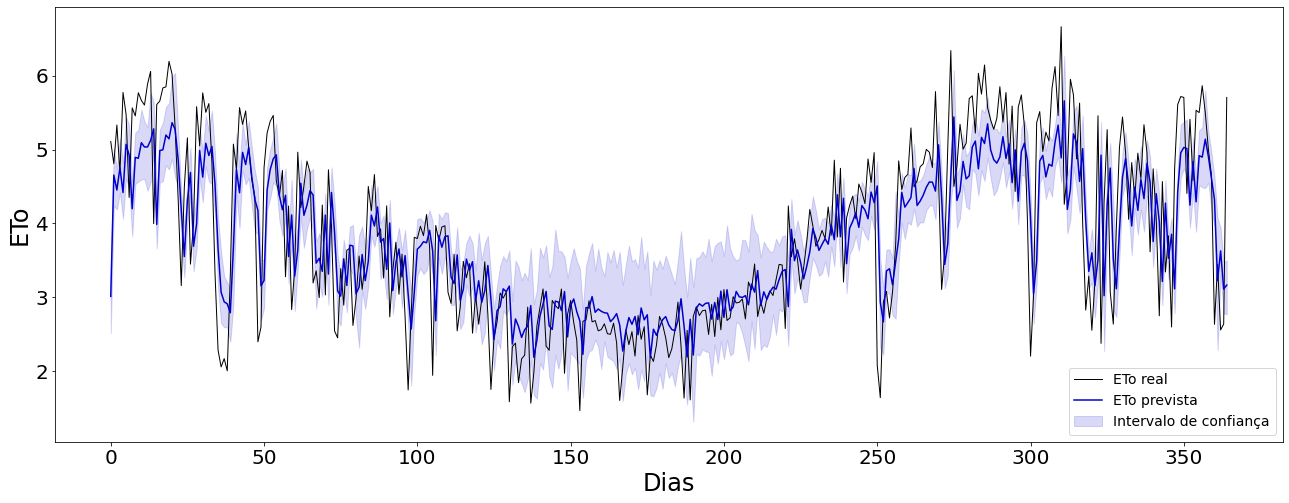

In [5]:
y_hat_CNN = np.zeros((365,100))
y_mean = np.zeros((365))
y_max = np.zeros((365))
y_min = np.zeros((365))
x = np.zeros((365))
for i in range(365):
    y = kde_list[0][i].sample(100)
    y_mean[i] = y.mean()
    y_max[i] = y.max()
    y_min[i] = y.min()
    y_hat_CNN[i,:] = y.reshape(1,-1)
    x[i] = i

fig, ax = plt.subplots(figsize=[22,8])
plt.grid(False)
plt.plot(x,test,'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(x,y_mean,'-', color = 'mediumblue', ms=4, lw=1, alpha=1, label='ETo prevista',linewidth=1.5)
ax.fill_between(x, y_min, y_max, color='mediumblue', alpha=0.15, label='Intervalo de confiança')
plt.tick_params(labelsize=20)
plt.legend(fontsize=14)
plt.xlabel("Dias", fontsize=24)
plt.ylabel("ETo", fontsize=24)

##Análise dos resíduos para o horizonte de previsão 1

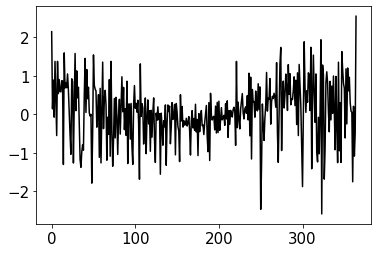

In [6]:
residuals = test - yhat[:,0]
plt.plot(x,residuals,'-', color = 'black', ms=4, lw=1, alpha=1, linewidth=1.5)
plt.tick_params(labelsize=15)

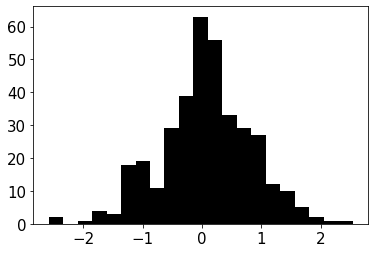

In [7]:
plt.hist(residuals, bins='auto', color='black')
plt.tick_params(labelsize=15)

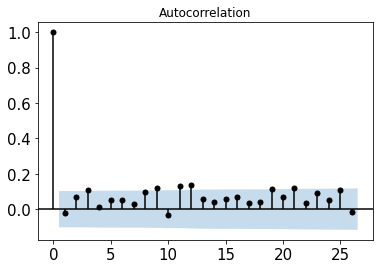

In [8]:
plot_acf(residuals, plt.gca(), color='black', )
plt.tick_params(labelsize=15)

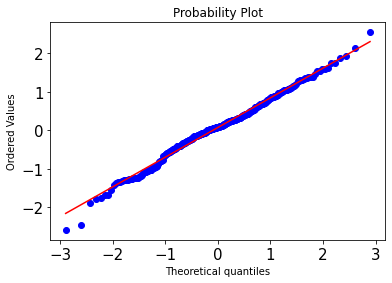

In [9]:
stats.probplot(np.reshape(residuals, (-1)), dist=stats.norm, plot=plt)
plt.tick_params(labelsize=15)
plt.show()